<a href="https://colab.research.google.com/github/erichsdb/Neurocomputing/blob/main/notebooks/4-MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple linear regression

Let's now investigate **multiple linear regression** (MLR), where several output depends on more than one input variable:

$$
\begin{cases}
y_1 = w_1 \, x_1 + w_2 \, x_2 + b_1\\
\\
y_2 = w_3 \, x_1 + w_4 \, x_2 + b_2\\
\end{cases}
$$

The California Housing Dataset consists of price of houses in various places in California. Alongside with the price of over 20000 houses, the dataset provides 8 features:

- `MedInc`       : median income in block group
- `HouseAge`     : median house age in block group
- `AveRooms`     : average number of rooms per household
- `AveBedrms`    : average number of bedrooms per household
- `Population`   : block group population
- `AveOccup`     : average number of household members
- `Latitude`     : block group latitude
- `Longitude`    : block group longitude

The California housing dataset can be directly downloaded from scikit-learn:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()

X = dataset.data
t = dataset.target

print(X.shape)
print(t.shape)

(20640, 8)
(20640,)


There are 20640 samples with 8 input features and one output (the price). The following cell decribes the dataset:

In [3]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

The following cell allows to visualize how each feature influences the price individually:

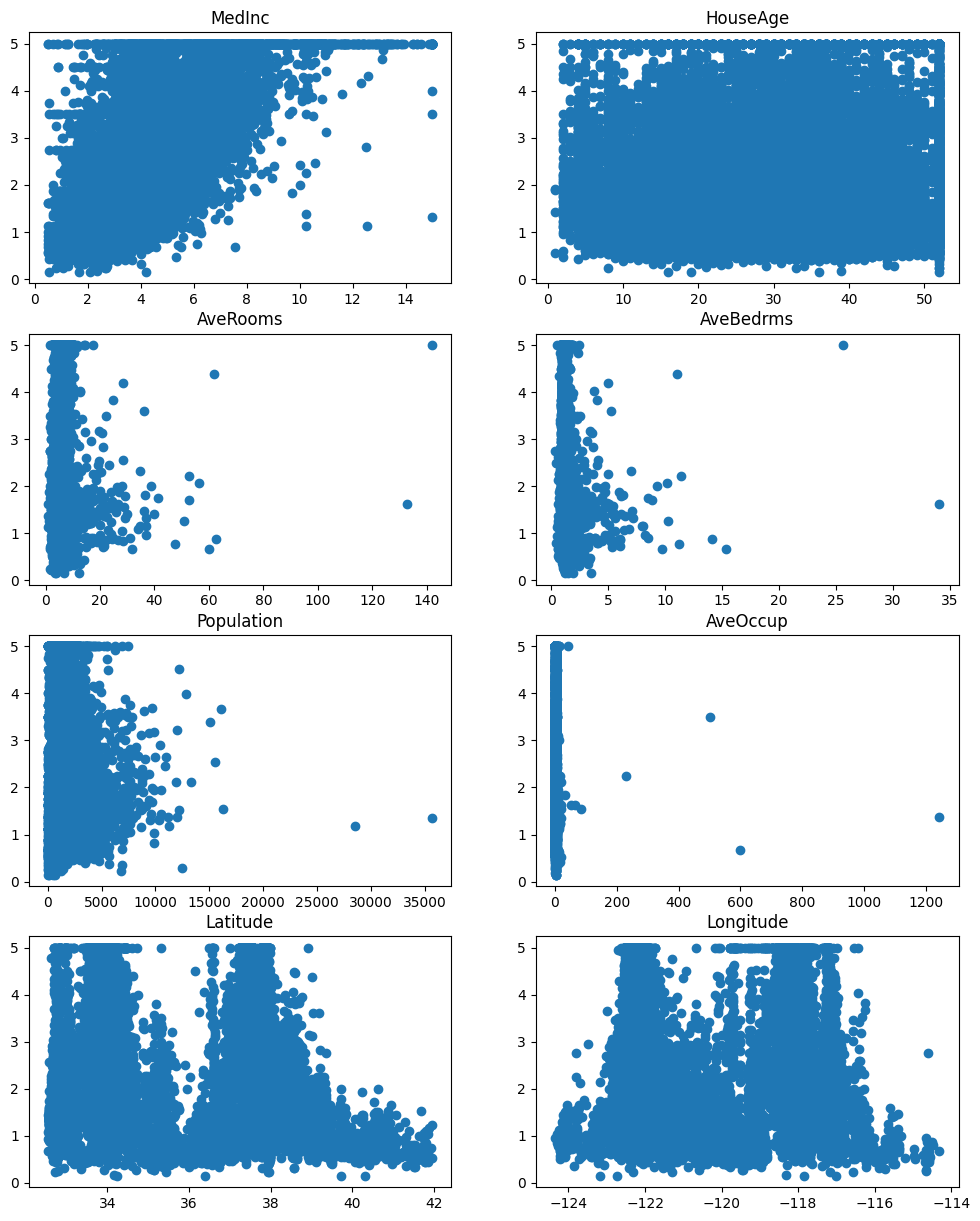

In [4]:
plt.figure(figsize=(12, 15))

for i in range(8):
    plt.subplot(4, 2 , i+1)
    plt.scatter(X[:, i], t)
    plt.title(dataset.feature_names[i])
plt.show()

## Linear regression

**Q:** Apply MLR on the California data using the same `LinearRegression` method of `scikit-learn` as last time. Print the mse, plot how the predictions predict the price for each feature,  and plot the prediction $y$ against the true value $t$ for each sample as in the last exercise. Does it work well?

You will also plot the weights of the model (`reg.coef_`) and conclude on the relative importance of the different features: which feature has the stronger weight and why?

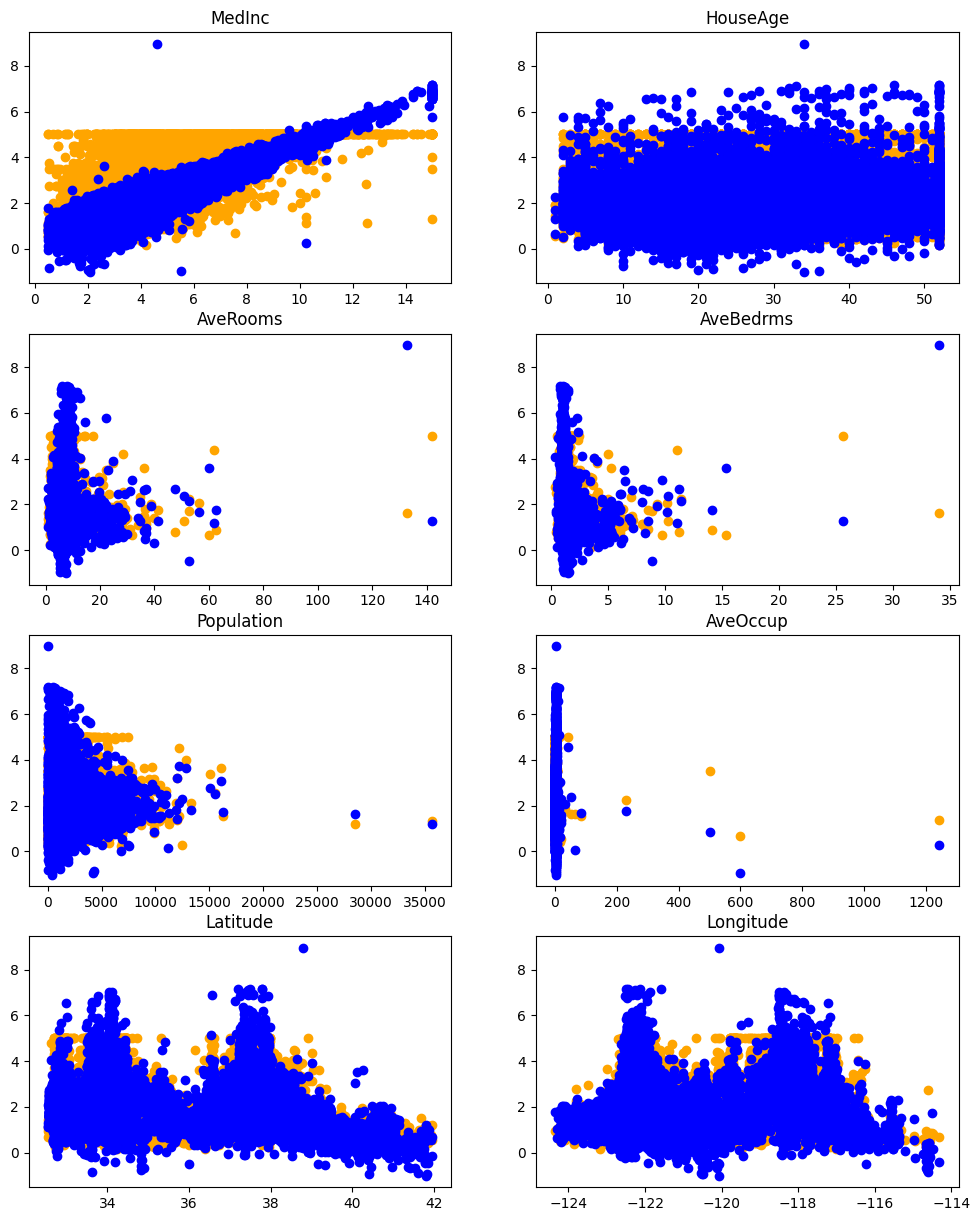

MedInc, Coef: 0.44
HouseAge, Coef: 0.01
AveRooms, Coef: -0.11
AveBedrms, Coef: 0.65
Population, Coef: -0.0
AveOccup, Coef: -0.0
Latitude, Coef: -0.42
Longitude, Coef: -0.43


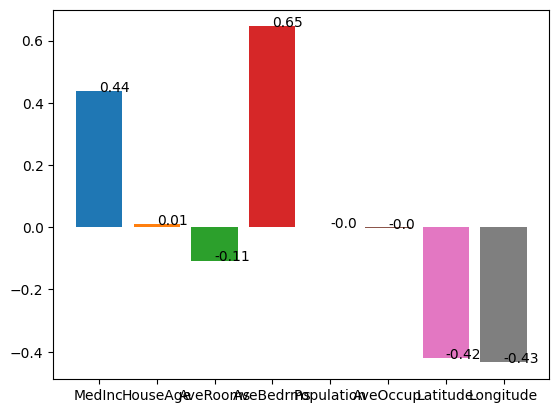

MSE: 0.52


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

plt.figure(figsize=(12, 15))

reg = LinearRegression()
reg.fit(X, t)
y = reg.predict(X)
mse = mean_squared_error(t, y)

for i in range(8):
    plt.subplot(4, 2 , i+1)
    plt.scatter(X[:, i].reshape(-1, 1), t, c='orange')
    plt.scatter(X[:, i].reshape(-1, 1), y, c='blue')
    plt.title(dataset.feature_names[i])

plt.show()

# Der Koeffizient bestimmt den Einfluss von X (dem Input) auf das Ergebnis
#  + ", Coef: " + str(round(reg.coef_[0], 2)) + ", MSE: " + str(round(mse, 2))
for i in range(8):
    print(dataset.feature_names[i] + ", Coef: " + str(round(reg.coef_[i], 2)))
    # bar plot
    plt.bar(i, reg.coef_[i])
    # text label
    plt.text(i, reg.coef_[i], round(reg.coef_[i], 2))
    plt.xticks(np.arange(8), dataset.feature_names)
plt.show()
print("MSE: " + str(round(mse, 2)))

A good practice in machine learning is to **normalize** the inputs, i.e. to make sure that the features have a mean of 0 and a standard deviation of 1. The formula is:

$$X^\text{normalized} = \dfrac{X - \mathbb{E}[X]}{\text{std}(X)}$$

i.e. you compute the mean and standard deviation of each column of `X` and apply the formula on each column.

**Q:** Normalize the dataset. Make sure that the new mean and std is correct.

*Tip:* `X.mean(axis=0)` and `X.std(axis=0)` should be useful.

In [34]:
for i in range(8):
    X[:, i] = (X[:, i] - X[:, i].mean()) / X[:, i].std()
# print mean and std
print(X.mean(axis=0))
print(X.std(axis=0))

[ 6.60969987e-17  5.50808322e-18  6.60969987e-17 -1.06030602e-16
 -1.10161664e-17  3.44255201e-18 -1.07958431e-15 -8.52651283e-15]
[1. 1. 1. 1. 1. 1. 1. 1.]


**Q:** Apply MLR again on $X^\text{normalized}$, print the mse and visualize the weights. What has changed?

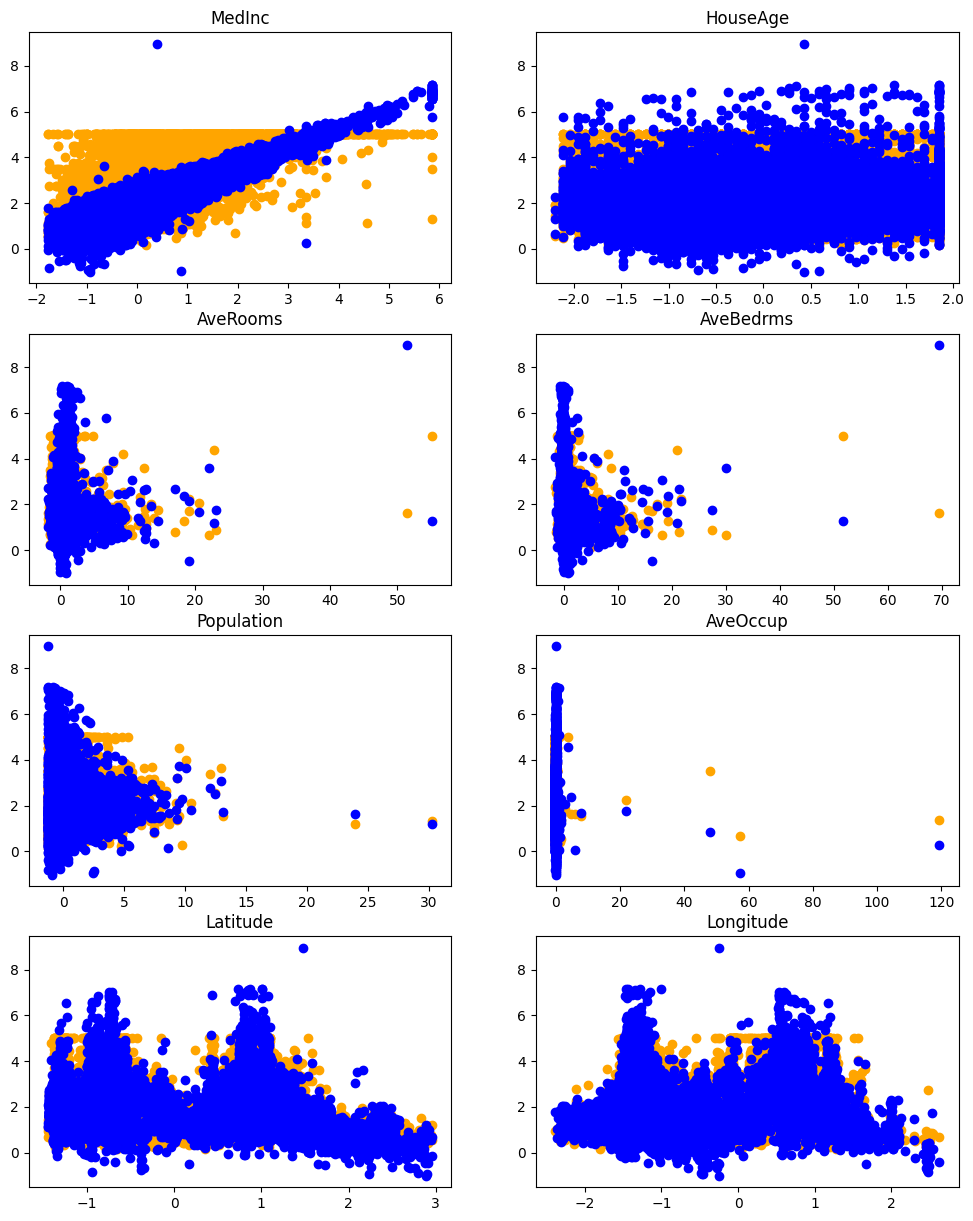

MedInc, Coef: 0.83
HouseAge, Coef: 0.12
AveRooms, Coef: -0.27
AveBedrms, Coef: 0.31
Population, Coef: -0.0
AveOccup, Coef: -0.04
Latitude, Coef: -0.9
Longitude, Coef: -0.87


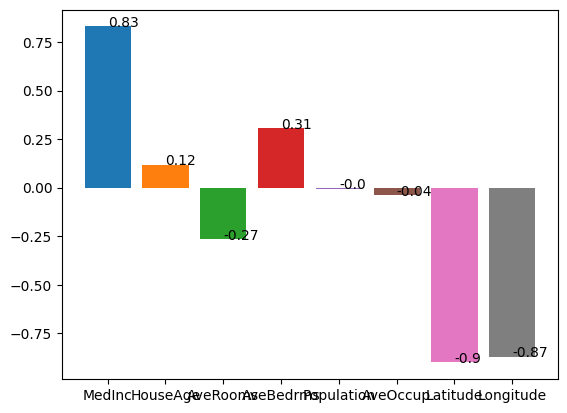

MSE: 0.52


In [35]:
plt.figure(figsize=(12, 15))

reg = LinearRegression()
reg.fit(X, t)
y = reg.predict(X)
mse = mean_squared_error(t, y)

for i in range(8):
    plt.subplot(4, 2 , i+1)
    plt.scatter(X[:, i].reshape(-1, 1), t, c='orange')
    plt.scatter(X[:, i].reshape(-1, 1), y, c='blue')
    plt.title(dataset.feature_names[i])

plt.show()

# Der Koeffizient bestimmt den Einfluss von X (dem Input) auf das Ergebnis
#  + ", Coef: " + str(round(reg.coef_[0], 2)) + ", MSE: " + str(round(mse, 2))
for i in range(8):
    print(dataset.feature_names[i] + ", Coef: " + str(round(reg.coef_[i], 2)))
    # bar plot
    plt.bar(i, reg.coef_[i])
    # text label
    plt.text(i, reg.coef_[i], round(reg.coef_[i], 2))
    plt.xticks(np.arange(8), dataset.feature_names)
plt.show()
print("MSE: " + str(round(mse, 2)))

# MedInc is now the most important feature
# AvgBedRooms has become less relevant
# Longitude and Latitude have a negative influence

## Regularized regression

Now is time to investigate **regularization**:
1. MLR with L2 regularization is called **Ridge regression**
2. MLR with L1 regularization is called **Lasso regression**

Fortunately, `scikit-learn` provides these methods with a similar interface to `LinearRegression`. The `Ridge` and `Lasso` objects take an additional argument `alpha` which represents the regularization parameter:

```python
reg = Ridge(alpha=1.0)
reg = Lasso(alpha=1.0)
```

In [36]:
from sklearn.linear_model import Ridge, Lasso

**Q:** Apply Ridge and Lasso regression on the scaled data, vary the regularization parameter to understand its function and comment on the results. In particular, vary the regularization parameter for LASSO and identify the features which are the most predictive of the price. Does it make sense?  

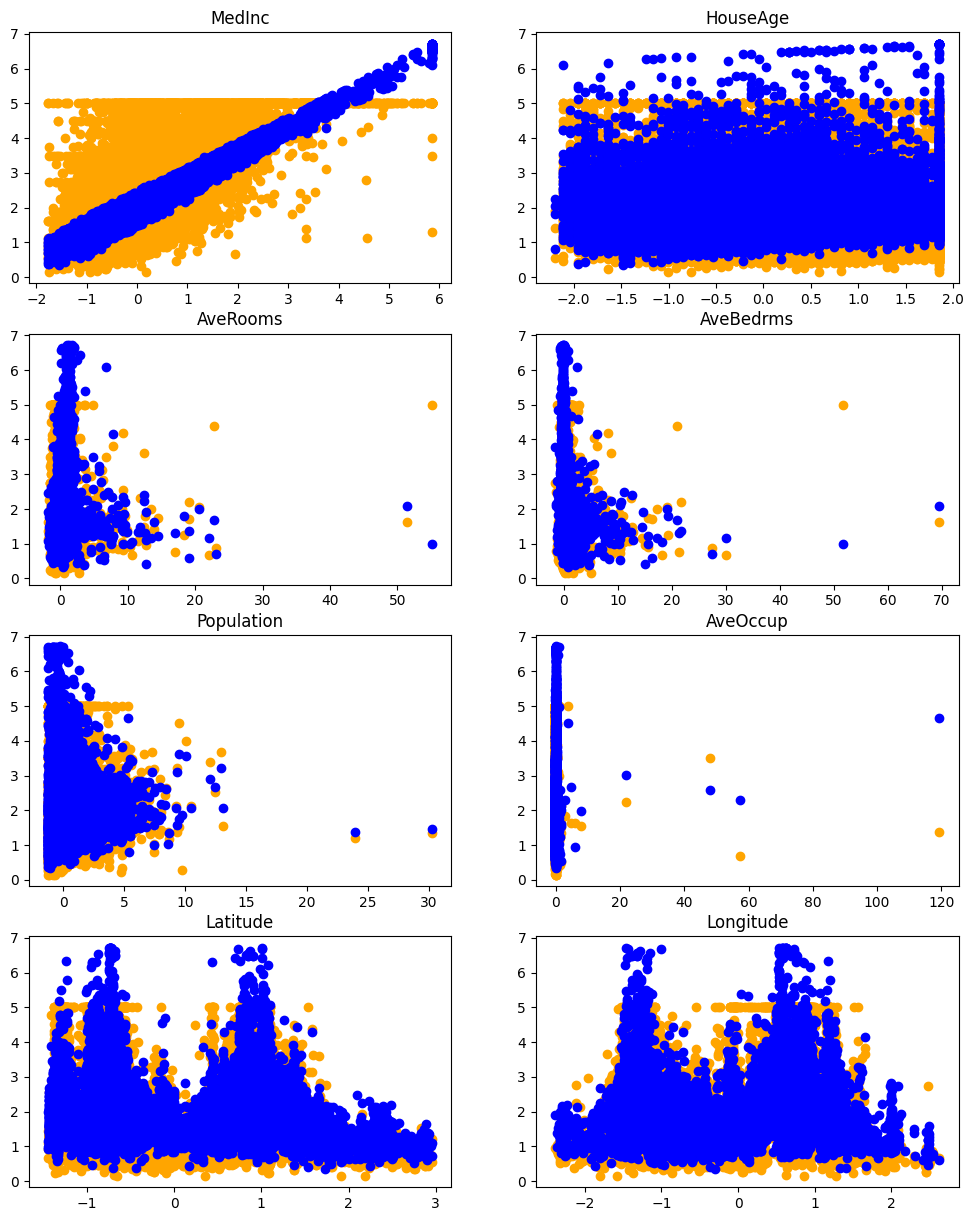

MedInc, Coef: 0.74
HouseAge, Coef: 0.14
AveRooms, Coef: -0.0
AveBedrms, Coef: 0.0
Population, Coef: 0.0
AveOccup, Coef: -0.0
Latitude, Coef: -0.26
Longitude, Coef: -0.22


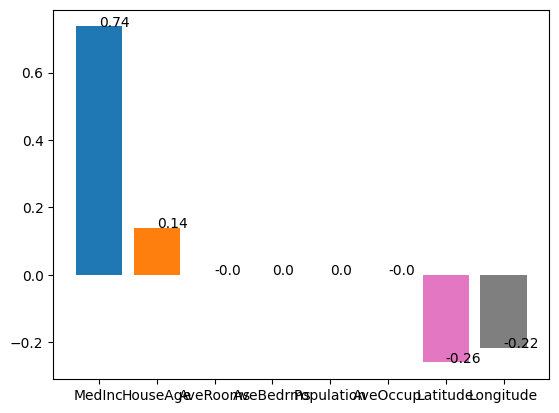

MSE: 0.61


In [42]:
plt.figure(figsize=(12, 15))

reg = Lasso(alpha=0.05)
reg.fit(X, t)
y = reg.predict(X)
mse = mean_squared_error(t, y)

for i in range(8):
    plt.subplot(4, 2 , i+1)
    plt.scatter(X[:, i].reshape(-1, 1), t, c='orange')
    plt.scatter(X[:, i].reshape(-1, 1), y, c='blue')
    plt.title(dataset.feature_names[i])

plt.show()

for i in range(8):
    print(dataset.feature_names[i] + ", Coef: " + str(round(reg.coef_[i], 2)))
    # bar plot
    plt.bar(i, reg.coef_[i])
    # text label
    plt.text(i, reg.coef_[i], round(reg.coef_[i], 2))
    plt.xticks(np.arange(8), dataset.feature_names)
plt.show()
print("MSE: " + str(round(mse, 2)))

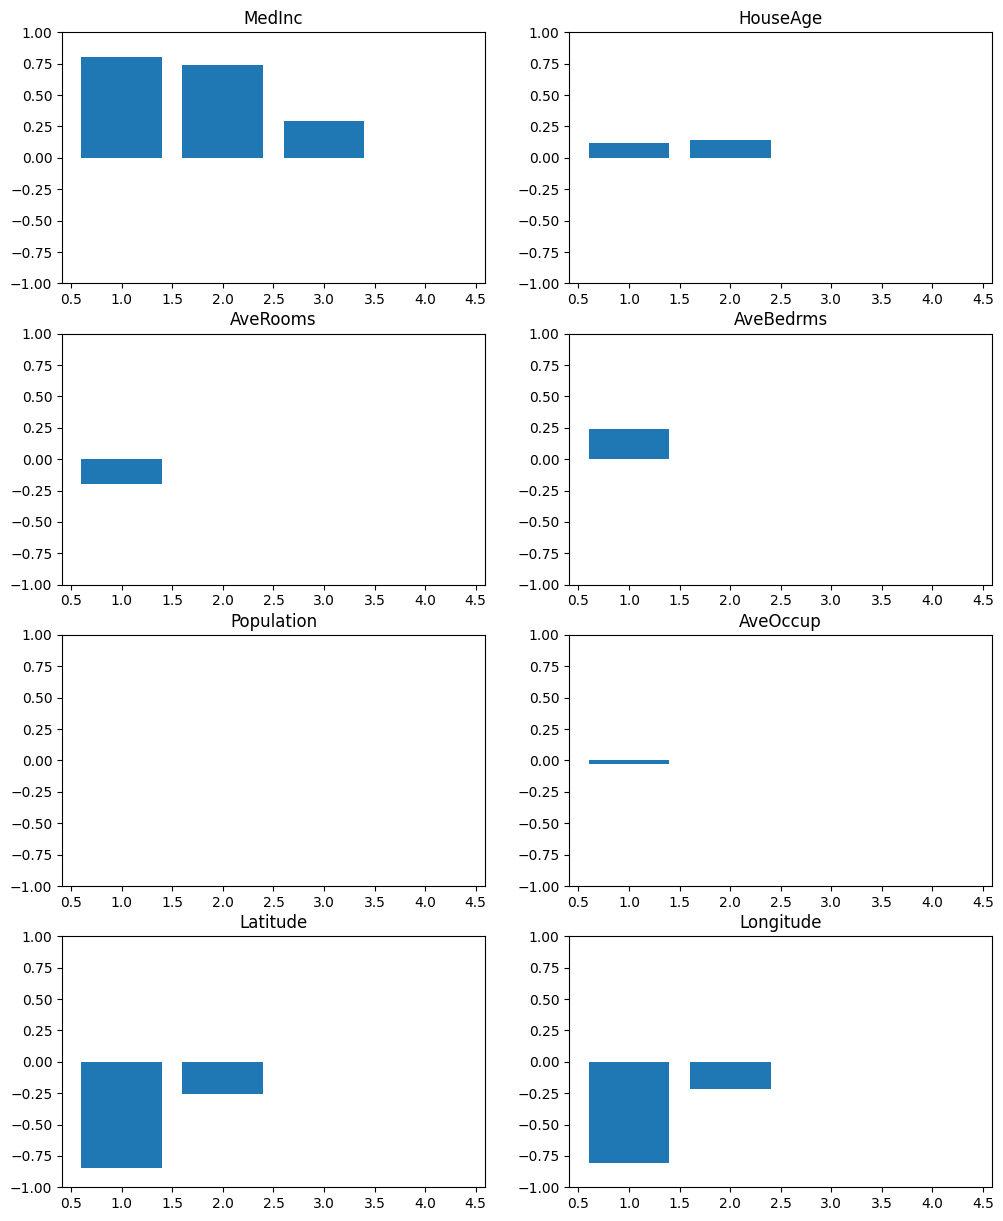

In [54]:
plt.figure(figsize=(12, 15))

alpha_values = [0.005, 0.05, 0.5, 1]
result = []

for alpha in alpha_values:
    reg = Lasso(alpha=alpha)
    reg.fit(X, t)
    y = reg.predict(X)
    mse = mean_squared_error(t, y)

    row = []
    for i in range(8):
        row.append(round(reg.coef_[i], 2))
    result.append(row)

# plot alpha values and result with 8 bar chartsfor each feature
for i in range(8):
    plt.subplot(4, 2 , i+1)
    plt.bar([1, 2, 3, 4], [row[i] for row in result])
    # make y from 0..1
    plt.ylim(-1, 1)
    # make x show
    plt.title(dataset.feature_names[i])

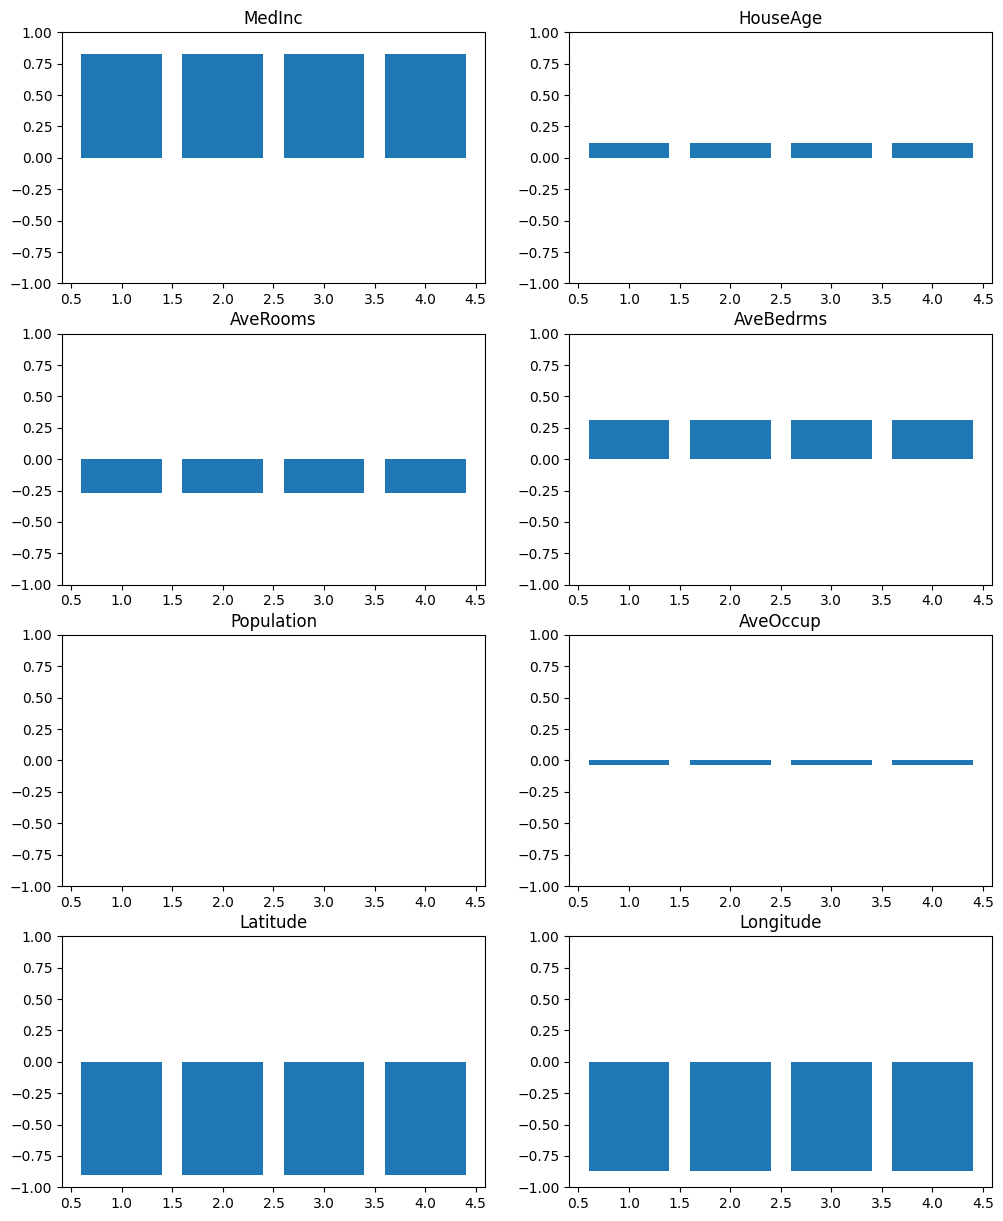

In [53]:
plt.figure(figsize=(12, 15))

alpha_values = [0.005, 0.05, 0.5, 1]
result = []

for alpha in alpha_values:
    reg = Ridge(alpha=alpha)
    reg.fit(X, t)
    y = reg.predict(X)
    mse = mean_squared_error(t, y)

    row = []
    for i in range(8):
        row.append(round(reg.coef_[i], 2))
    result.append(row)

# plot alpha values and result with 8 bar chartsfor each feature
for i in range(8):
    plt.subplot(4, 2 , i+1)
    plt.bar([1, 2, 3, 4], [row[i] for row in result])
    # make y from 0..1
    plt.ylim(-1, 1)
    # make x show
    plt.title(dataset.feature_names[i])